In [38]:
import sys
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import scipy.signal as sps
import seaborn as sns

plt.rcParams["figure.figsize"] = (20, 9) # (w, h)


In [22]:
filelist = []
for file in os.listdir(r"C:\Users\jychou\jupyter project\adas_log"):
    #print(file)
    #filelist.append(file)
    
    t = (r"C:\Users\jychou\jupyter project\adas_log",file)
    s = '\\'
    s = s.join(t)
    filelist.append(s)

In [23]:
filelist.reverse()
filelist

['C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210121_09-11-56-221.log.08',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210121_09-11-56-221.log.07',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210121_09-11-56-221.log.06',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210121_09-11-56-221.log.05',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210121_09-11-56-221.log.04',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210121_09-11-56-221.log.03',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210121_09-11-56-221.log.02',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210121_09-11-56-221.log.01',
 'C:\\Users\\jychou\\jupyter project\\adas_log\\log_logcat@20210121_09-11-56-221.log']

In [36]:
#parse log and create clear raw_data
l1_a = []
l1_b = []
l1_c = []
l1_d = []

r1_a = []
r1_b = []
r1_c = []
r1_d = []

l2_a = []
l2_b = []
l2_c = []
l2_d = []

r2_a = []
r2_b = []
r2_c = []
r2_d = []

def parse_raw_data(raw_data):
    result_list = raw_data.split(",")
    #display(result)
    for mystr in result_list:
        if "l1_a" in mystr:
            value_list = mystr.split("=")
            l1_a.append(float(value_list[1]))
        elif "l1_b" in mystr:
            value_list = mystr.split("=")
            l1_b.append(float(value_list[1]))
        elif "l1_c" in mystr:
            value_list = mystr.split("=")
            l1_c.append(float(value_list[1]))
        elif "l1_d" in mystr:
            value_list = mystr.split("=")
            l1_d.append(float(value_list[1]))
        elif "r1_a" in mystr:
            value_list = mystr.split("=")
            r1_a.append(float(value_list[1]))
        elif "r1_b" in mystr:
            value_list = mystr.split("=")
            r1_b.append(float(value_list[1]))
        elif "r1_c" in mystr:
            value_list = mystr.split("=")
            r1_c.append(float(value_list[1]))
        elif "r1_d" in mystr:
            value_list = mystr.split("=")
            r1_d.append(float(value_list[1]))
        elif "l2_a" in mystr:
            value_list = mystr.split("=")
            l2_a.append(float(value_list[1]))
        elif "l2_b" in mystr:
            value_list = mystr.split("=")
            l2_b.append(float(value_list[1]))
        elif "l2_c" in mystr:
            value_list = mystr.split("=")
            l2_c.append(float(value_list[1]))
        elif "l2_d" in mystr:
            value_list = mystr.split("=")
            l2_d.append(float(value_list[1]))
        elif "r2_a" in mystr:
            value_list = mystr.split("=")
            r2_a.append(float(value_list[1]))
        elif "r2_b" in mystr:
            value_list = mystr.split("=")
            r2_b.append(float(value_list[1]))
        elif "r2_c" in mystr:
            value_list = mystr.split("=")
            r2_c.append(float(value_list[1]))
        elif "r2_d" in mystr:
            value_list = mystr.split("=")
            r2_d.append(float(value_list[1]))           

for file in filelist:
    rawdata_counter = 0
    with open(file,"r",encoding="utf-8",errors='ignore') as F:
        raw_data = F.readline()
        #lines = F.readlines()
        
        while raw_data:
            if "l1_a" in raw_data:
                #print(raw_data)
                parse_raw_data(raw_data)
                rawdata_counter = rawdata_counter + 1
            try:
                raw_data = F.readline()
            except Exception as e:
                print(e)
                break
        print(f"parse {rawdata_counter} line")
            

    
    

parse 262 line
parse 451 line
parse 395 line
parse 419 line
parse 439 line
parse 453 line
parse 429 line
parse 469 line
parse 59 line


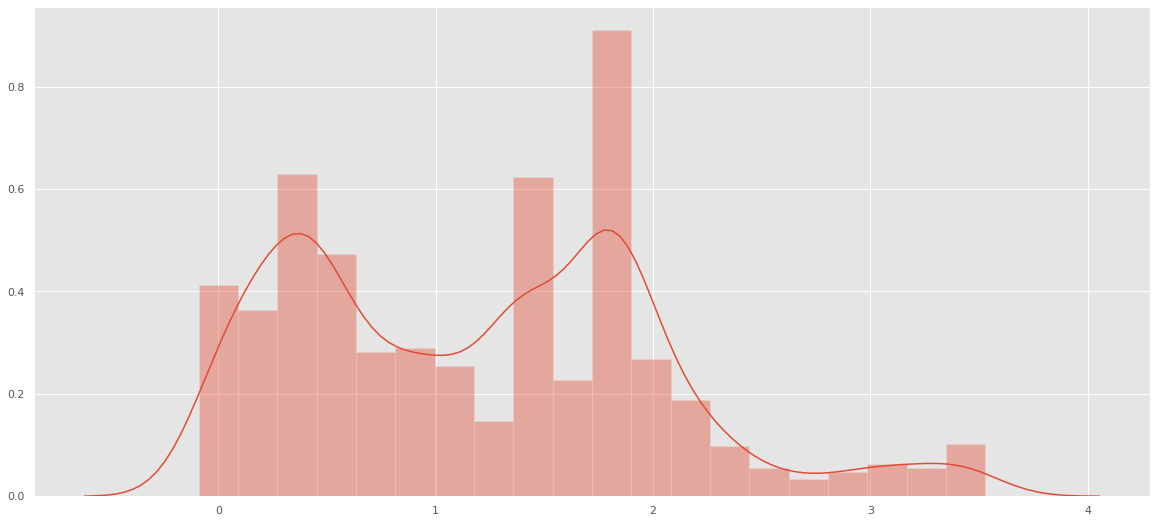

In [50]:
#plt.plot(r1_a,"b.")
sns.distplot(l2_a)

(array([ 43., 248., 450., 357., 249., 257., 142., 377., 519., 316., 133.,
         49.,  26.,  40.,  56.,  76.,   9.,   9.,  11.,   9.]),
 array([-3.61  , -3.3795, -3.149 , -2.9185, -2.688 , -2.4575, -2.227 ,
        -1.9965, -1.766 , -1.5355, -1.305 , -1.0745, -0.844 , -0.6135,
        -0.383 , -0.1525,  0.078 ,  0.3085,  0.539 ,  0.7695,  1.    ]),
 <a list of 20 Patch objects>)

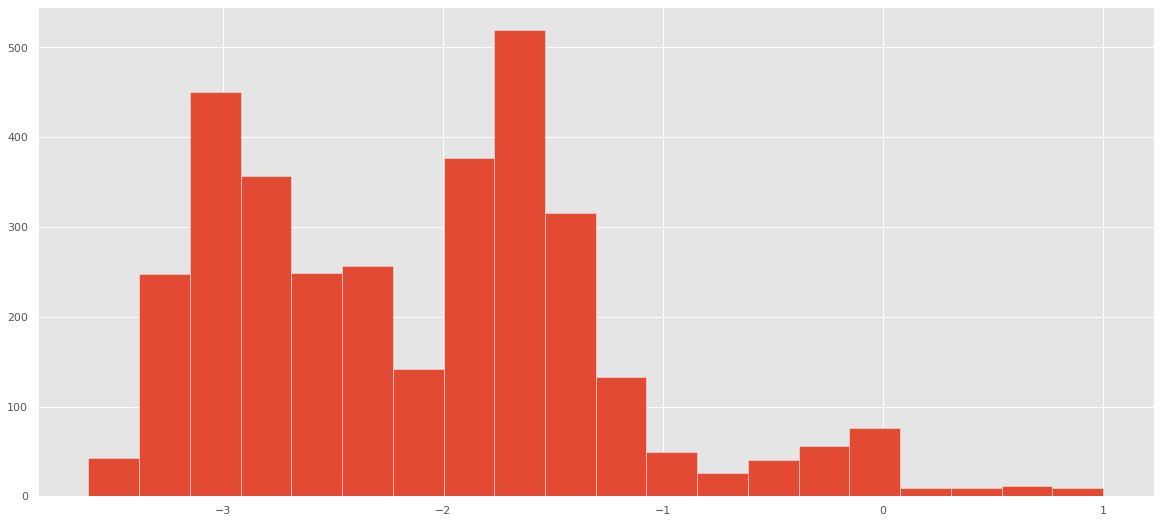

In [51]:
l2_a
plt.hist(r2_a, bins=20)

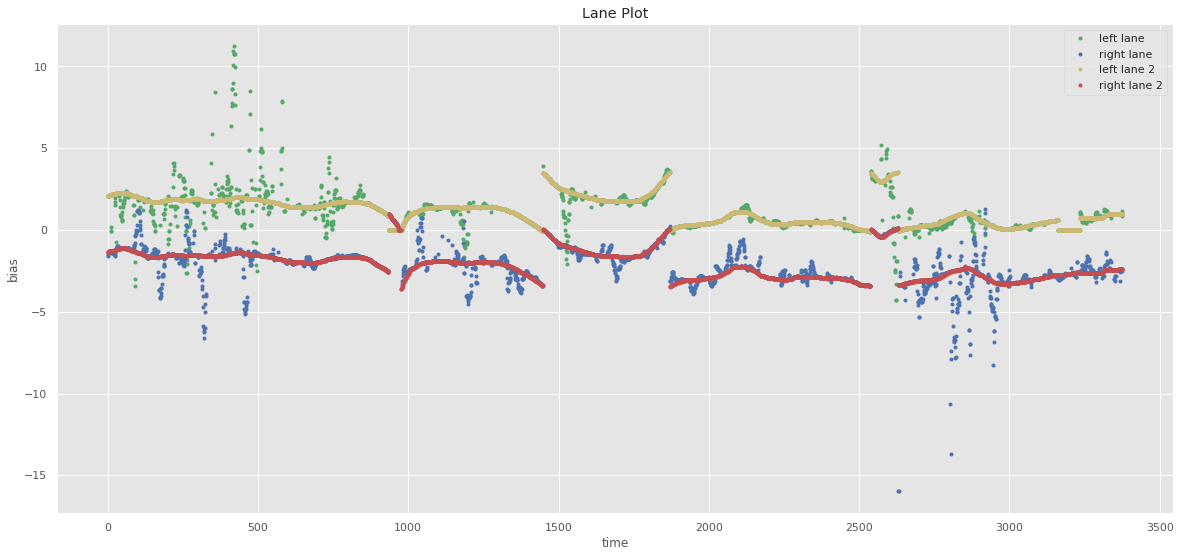

In [47]:
plt.title('Lane Plot')
plt.xlabel('time')
plt.ylabel('bias')

plt.plot(l1_a,"g.")
plt.plot(r1_a,"b.")
plt.plot(l2_a,"y.")
plt.plot(r2_a,"r.")
plt.legend(['left lane','right lane', 'left lane 2','right lane 2'])


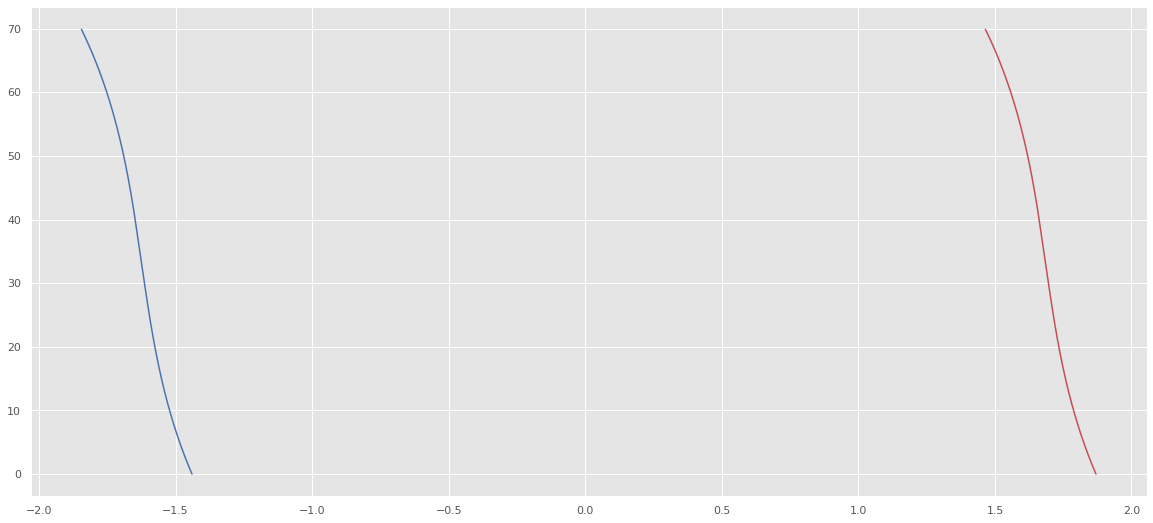

In [28]:
# evenly sampled time at 200ms intervals
z = np.arange(0., 70, 0.1)
index = 500

fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.set_aspect('equal')
plt.plot( l1_d[index] * (z**3) + l1_c[index] * (z**2) + l1_b[index] * (z) + l1_a[index], z,'r-')
plt.plot( r1_d[index] * (z**3) + r1_c[index] * (z**2) + r1_b[index] * (z) + r1_a[index], z,'b-')
plt.show()

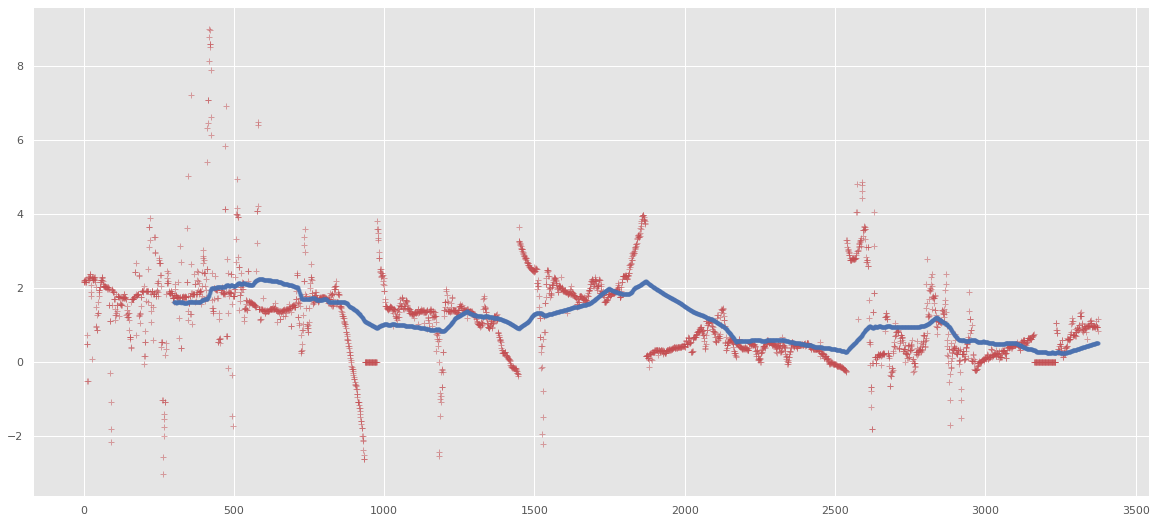

In [52]:
z = 10
t = np.arange(0,len(l1_d))
x_list = []
xavg_list = []
for tt in t:
    x = l1_d[int(tt)] * (z**3) + l1_c[int(tt)] * (z**2) + l1_b[int(tt)] * (z) + l1_a[int(tt)]
    x_list.append(x)
plt.plot(t, x_list , 'r+',alpha=0.5)   


l1_d_avg_list = []
l1_c_avg_list = []
l1_b_avg_list = []
l1_a_avg_list = []
window = 300

t2 = np.arange(window,len(l1_d))

for i in range(window,len(x_list)):
    l1_d_avg = sum(l1_d[i-window:i]) /window
    l1_d_avg_list.append(l1_d_avg)
    
    l1_c_avg = sum(l1_c[i-window:i]) /window
    l1_c_avg_list.append(l1_c_avg)
    

    l1_b_avg = sum(l1_b[i-window:i]) /window
    l1_b_avg_list.append(l1_b_avg)  
    
    l1_a_avg = sum(l1_a[i-window:i]) /window
    l1_a_avg_list.append(l1_a_avg)  

t = np.arange(0,len(l1_d)-window)
for tt in t:
    xavg = l1_d_avg_list[int(tt)] * (z**3) + l1_c_avg_list[int(tt)] * (z**2) + l1_b_avg_list[int(tt)] * (z) + l1_a_avg_list[int(tt)]
    xavg_list.append(xavg)
plt.plot(t2, xavg_list , 'b.',alpha=0.5)    




#plt.show()

In [30]:
sum(l1_d[:])

-0.0018070000000002036

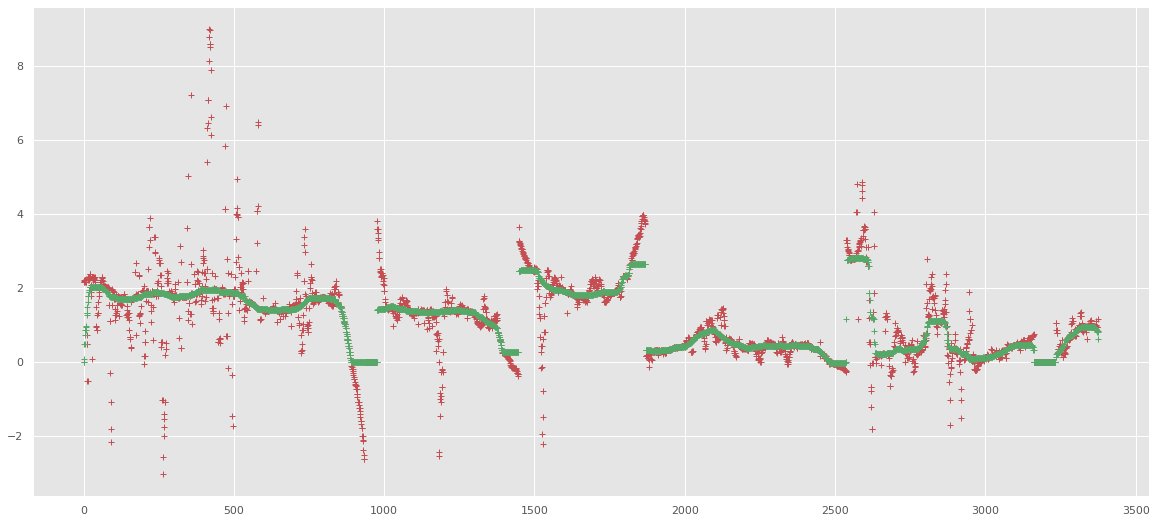

In [31]:
t = np.arange(0,len(l1_d))
medfilt_xlist =sps.medfilt(x_list,kernel_size= 101)
plt.plot(t, x_list , 'r+')
plt.plot(t, medfilt_xlist , 'g+')

In [32]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font='Noto Sans CJK TC')
mpl.style.use('ggplot')  # must put after sns.set
from matplotlib import animation
mpl.rc('animation', html='html5')


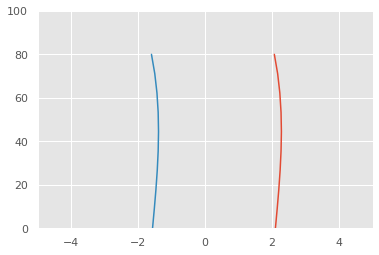

In [33]:
fig, ax = plt.subplots()

ax.set_xlim(( -5, 5))
ax.set_ylim((0, 100))

line, = ax.plot([], [])
line2, = ax.plot([], [])
#line, = plt.plot(z, l1_d[0] * (z**3) + l1_c[0] * (z**2) + l1_b[0] * (z) + l1_a[0], 'r-')
def animate(i):
    z = np.linspace(0, 80, 10)
    y = l1_d[i] * (z**3) + l1_c[i] * (z**2) + l1_b[i] * (z) + l1_a[i]
    y2 = r1_d[i] * (z**3) + r1_c[i] * (z**2) + r1_b[i] * (z) + r1_a[i]
    line.set_data(y, z)
    line2.set_data(y2, z)
    return (line,line2)

# frames: frames count
# interval: delay between frames in milliseconds
# blit: True means only re-draw the parts that have changed
anim = animation.FuncAnimation(
    fig, animate,
    frames=500,
    interval=150,
    blit=True
)

In [34]:
anim